In [2]:
#install dependencies
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install mlflow

In [6]:
import pandas as pd
import numpy as np

In [32]:
##load the dataset from sklearn 
from sklearn.datasets import load_iris
iris_data = load_iris()
X=iris_data.data
y=iris_data.target


In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [76]:
#create df for the dataset
df=pd.DataFrame(X,columns=iris_data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
#defining target column
df_target=pd.DataFrame(y,columns=['target'])
df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [78]:
#standarize the model
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_feature=scaler.transform(df)


In [79]:
#scaled dataframe
df_final=pd.DataFrame(scaled_feature,columns=df.columns)

In [80]:
df_final.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [81]:
##TEST-TRAIN SPLIT
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_feature,np.ravel(df_target),test_size=0.2,stratify=np.ravel(df_target),random_state=42)


In [82]:
#install necessary dependdenccy
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from mlflow.models.signature import infer_signature
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from sklearn import tree

In [83]:
#initializie the classes
kfold = KFold(n_splits=3, shuffle=True)
DTC = DecisionTreeClassifier()
SupportVM = SVC()
RFR = RandomForestRegressor(n_estimators=100,random_state=0)

In [84]:
#create  model accuracy using cross val
lstModels = [DTC,SupportVM,RFR]
for i in lstModels:
  model_score = cross_val_score(i,X,y,cv=kfold)
  print(f"Cross validation scores for {i}= {model_score}")
  print(f"Model Accuracy for {i}={model_score.mean()}")
  print('')

Cross validation scores for DecisionTreeClassifier()= [0.96 0.94 0.94]
Model Accuracy for DecisionTreeClassifier()=0.9466666666666667

Cross validation scores for SVC()= [0.94 0.96 0.92]
Model Accuracy for SVC()=0.94

Cross validation scores for RandomForestRegressor(random_state=0)= [0.93936584 0.95497363 0.92826909]
Model Accuracy for RandomForestRegressor(random_state=0)=0.940869520103357



In [85]:
#install necesaary dependency
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

def parameter_tuning(k_folds,trainx,trainy,clf):
    parameters = {'criterion': ['gini','entropy'], 'splitter': ['best','random'], 'max_depth': [2,3,4]}
    grid = GridSearchCV(clf, parameters, cv = k_folds)
    grid.fit(trainx,trainy)  ## create the grid search with various parameter

    best_max_depth = grid.best_params_['max_depth']
    best_splitter = grid.best_params_['splitter']
    best_criterion = grid.best_params_['criterion']

    return best_max_depth, best_splitter, best_criterion

def k_fold_cv(depth, splitterm, criterion, trainx, trainy,kfold):
    clf = DecisionTreeClassifier(max_depth=depth,splitter=splitterm,criterion=criterion)

    k_fold_scores = cross_val_score(clf, trainx,trainy,cv=kfold)
    return k_fold_scores, clf

def train_model(clf,trainx, trainy, testx, testy):
    clf.fit(trainx, trainy)
    train_accuracy = clf.score(trainx, trainy)
    test_accuracy = clf.score(testx,testy)
    pred = clf.predict(testx)
    return train_accuracy, test_accuracy, pred # train the model for various model

def accuracy_data(prediction,testy):
    accuracy = accuracy_score(testy,prediction)

    return accuracy  #check the accuracy

def create_confusion_matrix_plot(model, X_test, y_test):
    # Assuming you have your predicted labels in y_pred
    y_pred = model.predict(X_test)

    # Creating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Saving the graph
    plt.savefig('confusion_matrix.png')
    plt.show()

def save_image(clf):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
    tree.plot_tree(clf)
    fig.savefig("image.png")
    

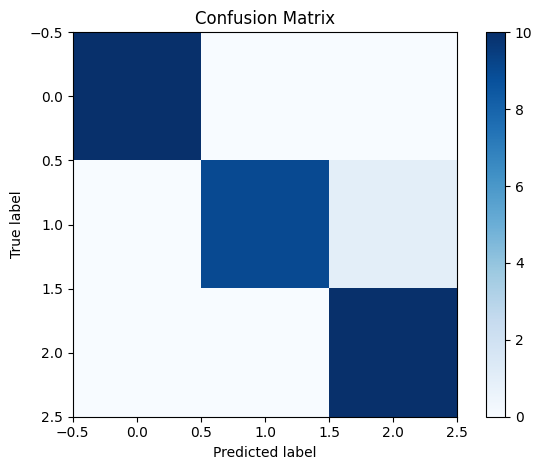

Registered model 'iris_dataset_final' already exists. Creating a new version of this model...
2023/06/12 15:16:43 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: iris_dataset_final, version 2
Created version '2' of model 'iris_dataset_final'.


Error occured: %s Path 'iris_model' already exists and is not empty


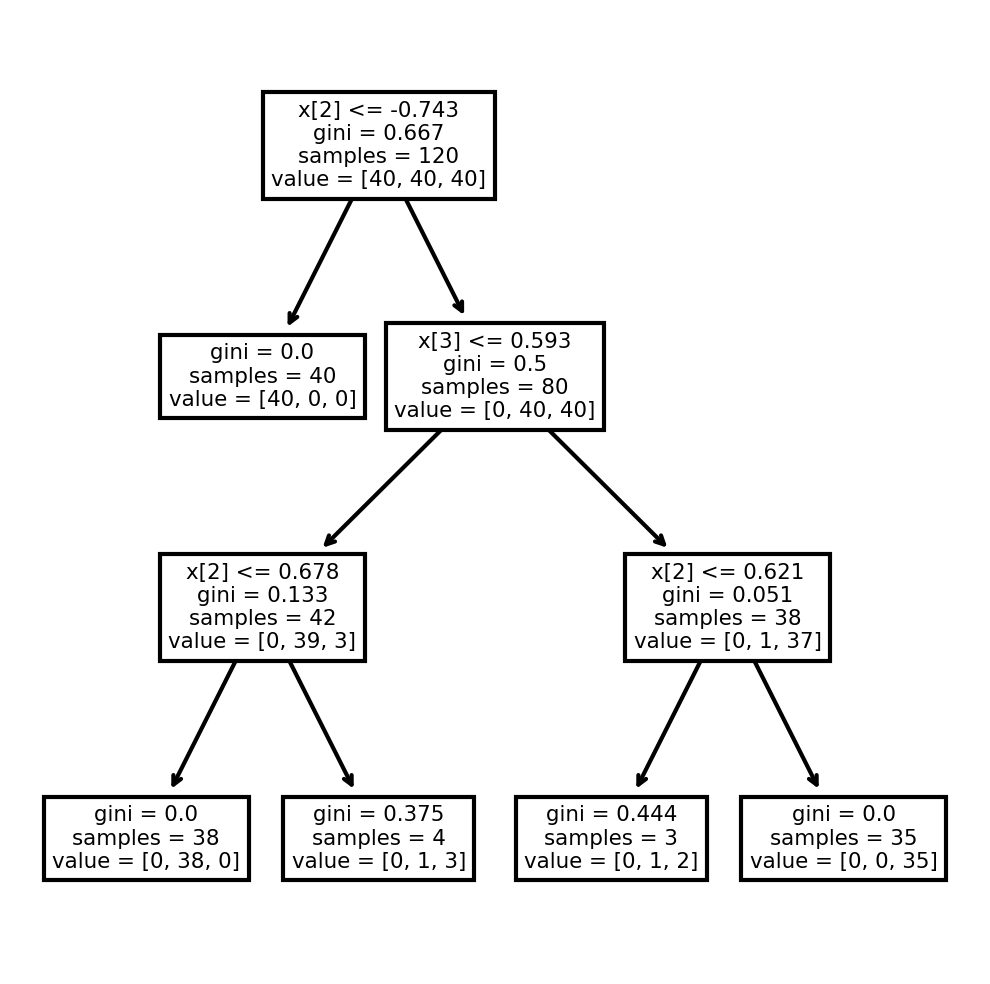

In [86]:
###mlflow
import mlflow
experiment_name = "ProjectAastha" 
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_name)
with mlflow.start_run(run_name='Model'):
    best_max_depth, best_splitter, best_criterion = parameter_tuning(kfold,X_train,y_train,DTC)
    mlflow.log_param(f'best_max_depth', best_max_depth)
    mlflow.log_param(f'best_criterion', best_criterion)
    mlflow.log_param(f'best_splitter', best_splitter)  ## crerate log for parameters

    k_fold_scores, clf = k_fold_cv(best_max_depth, best_splitter, best_criterion, X_train, y_train, kfold)
    mlflow.log_metric(f"average_accuracy", k_fold_scores.mean())
    mlflow.log_metric(f"std_accuracy", k_fold_scores.std())  ##og metrics 

    train_accuracy, test_accuracy, pred = train_model(clf, X_train, y_train,X_test,y_test)
    mlflow.log_metric(f"train_accuracy",train_accuracy )
    mlflow.log_metric(f"test_accuracy", test_accuracy)  
 
    mlflow.set_tag("First Tag","Decision Tree Classifier") ##set tags that can be used for future
    mlflow.set_tags({"Testing Tag":"Model working properly","Update Tag":"Hyperparameter Tuning","Model Status":"Model Uplaoded","Decision Tree Status":"Model Image Uploaded"})
    
    accuracy = accuracy_data(y_test, pred)

    mlflow.log_metric("Accuracy Score",accuracy)

    

    create_confusion_matrix_plot(clf,X_test,y_test)
    save_image(clf)

    mlflow.log_artifact("image.png")
    mlflow.log_artifact("confusion_matrix.png")

    predictions = clf.predict(X_train)
    signature = infer_signature(X_train,predictions)
    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

    if tracking_url_type_store != "file":  ## register model with the reigtered name and  signature
        mlflow.sklearn.log_model(clf,'model',registered_model_name='iris_dataset_final',signature=signature)
    else:
        mlflow.sklearn.log_model(clf,'model',signature=signature)
    
    try:
        mlflow.sklearn.save_model(clf, 'iris_model',serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_PICKLE)
    except Exception as e:
        print("Error occured: %s",e)
  

    

In [93]:
#CHANGE THE MODEL TO PRODUCTION
import mlflow
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris_dataset_final",
    version=2,
    stage="Production"
)

<ModelVersion: aliases=[], creation_timestamp=1686562302750, current_stage='Production', description='', last_updated_timestamp=1686563037104, name='iris_dataset_final', run_id='542c145e7d5f4006b3b63c78c023c2c6', run_link='', source='file:///C:/Users/user/mlflowproject/artifacts/7/542c145e7d5f4006b3b63c78c023c2c6/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>

In [92]:
#deployment fetching the end point
import requests

inference_request = {
        "dataframe_records":[[1.2,2.3,4.4,6.6]]
}
endpoint = "http://localhost:1234/invocations"
response = requests.post(endpoint, json=inference_request)
print(response.text)

{"predictions": [2]}


In [89]:
#Do Prediction batch
import requests
lst = df.values.tolist()
inference_request = {
        "dataframe_records": lst
}
endpoint = "http://localhost:1234/invocations"
response = requests.post(endpoint, json=inference_request)
print(response)

<Response [200]>


In [90]:
print(response.text)

{"predictions": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]}
